In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Data Processing

In [2]:
#loading the dataset to a pandas Dataframe
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# number of rows and columns
diabetes_data.shape

(768, 9)

In [6]:
#describe --> statistical measures of the data
diabetes_data.describe()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating data and Labels
X = diabetes_data.drop(columns='Outcome', axis=1)
Y = diabetes_data['Outcome']

In [10]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Training and Test data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (691, 8) (77, 8)


In [13]:
print(X_train)
print(Y_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
331            2       87             58             16       52  32.7   
245            9      184             85             15        0  30.0   
107            4      144             58             28      140  29.5   
669            9      154             78             30      100  30.9   
585            1       93             56             11        0  22.5   
..           ...      ...            ...            ...      ...   ...   
199            4      148             60             27      318  30.9   
137            0       93             60             25       92  28.7   
645            2      157             74             35      440  39.4   
0              6      148             72             35        0  33.6   
187            1      128             98             41       58  32.0   

     DiabetesPedigreeFunction  Age  
331                     0.166   25  
245                     1.213   49  


# Model Training --> SVC

In [14]:
from sklearn import svm
#Create a svm Classifier
model = svm.SVC(kernel='linear') 

In [15]:
#training the SVC model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [16]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7959479015918958


In [17]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.6883116883116883


condusion matrix for training data


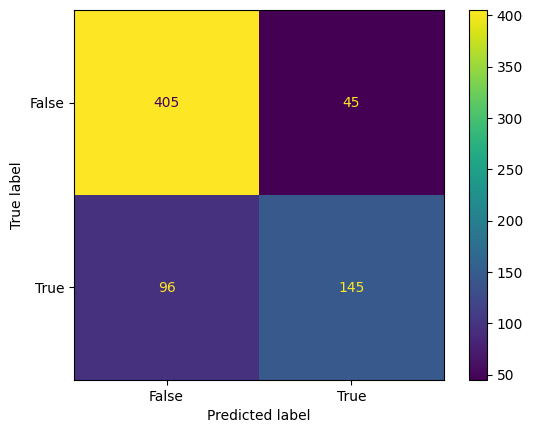

In [18]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = Y_train
predicted = X_train_prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

print("condusion matrix for training data")
cm_display.plot()
plt.show()

condusion matrix for testing data


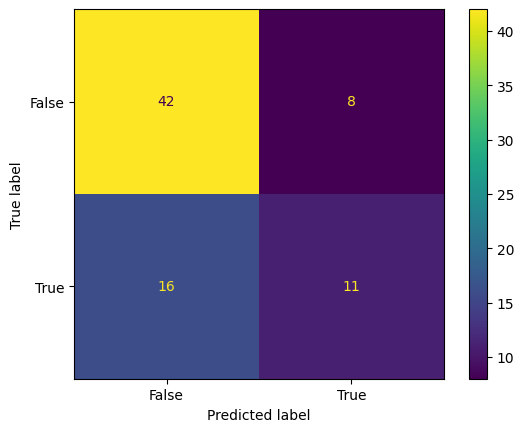

In [19]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = Y_test
predicted = X_test_prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

print("condusion matrix for testing data")
cm_display.plot()
plt.show()

# Model Training --> Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()  

In [21]:
#training the SVC model with training data
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [22]:
#accuracy on training data
X_train_prediction_clf = clf.predict(X_train)
training_data_accuracy_clf = accuracy_score(X_train_prediction_clf, Y_train) 
print('Accuracy on training data : ', training_data_accuracy_clf)

Accuracy on training data :  1.0


In [23]:
#accuracy on test data
X_test_prediction_clf = clf.predict(X_test)
test_data_accuracy_clf = accuracy_score(X_test_prediction_clf, Y_test) 
print('Accuracy on test data : ', test_data_accuracy_clf)

Accuracy on test data :  0.6753246753246753


condusion matrix for Testing data


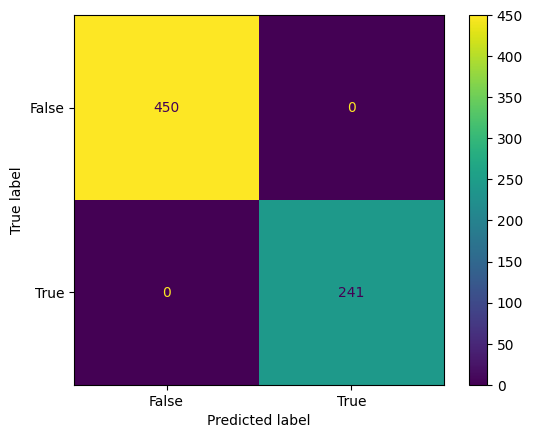

In [24]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = Y_train
predicted = X_train_prediction_clf

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

print("condusion matrix for Testing data")
cm_display.plot()
plt.show()

# Predictive System

In [25]:
Pregnancies = float(input("Enter a pregenecies count of patient: "))
Glucose = float(input("Enter the Glucose rate of patient: "))
BloodPressure = float(input("Enter the Blood Pressure rate of patient: "))
SkinThickness = float(input("ENter the skin Thickness of patient: "))
Insulin = float(input("Enter the insuline rate of patient: "))
BMI = float(input("Enter the Body mass Index of Patient: "))
DiabetesPedigreeFunction = float(input("Enter the Diabetes Pedigree Function value of patient: "))
Age = float(input("Enter the age of the patient: "))


input_data = [Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('The patient has a diabetes')
else:
  print('The Person is safe no diabetes found')


Enter a pregenecies count of patient:  12
Enter the Glucose rate of patient:  16
Enter the Blood Pressure rate of patient:  15
ENter the skin Thickness of patient:  24
Enter the insuline rate of patient:  2
Enter the Body mass Index of Patient:  21
Enter the Diabetes Pedigree Function value of patient:  12
Enter the age of the patient:  21


[0]
The Person is safe no diabetes found


C:\Users\swaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
import joblib
joblib.dump(model,open('svm.pkl','wb'))

In [ ]:
input_data = [Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]
print(len(input_data))